In [2]:
import sys
sys.path.append('./../')

import xml.etree.ElementTree as ET
import numpy as np
import ikamoana as ika
import xarray as xr
import matplotlib.pyplot as plt
import os
import parcels

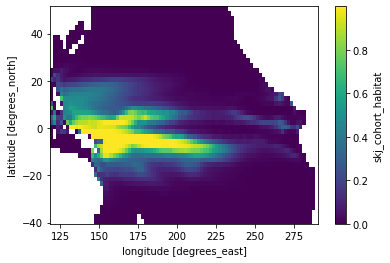

In [3]:
fh = xr.load_dataarray("./../data/Inna/Modified_skj_cohort_habitat_20080115-20080515_20080115.nc")
fh.mean(axis=0).plot()

In [4]:
ika_s = ika.IkaSim('./../data/ikamoana_config/IkaSim_Example.xml')
ika_s.generateForcing(from_habitat=fh)

In [5]:
ika_s.forcing_gen.ikamoana_fields_structure.timestep

2592000.0

In [6]:
advection_x_ika = ika_s.forcing['Tx'] + ika_s.forcing['U']
advection_y_ika = ika_s.forcing['Ty'] + ika_s.forcing['V']
diffusion_ika = ika_s.forcing['K']

# Converte meter per second to nautic miles per month
advection_x_ika = ((advection_x_ika * 30 * 24 * 60 * 60) / 1852)
advection_y_ika = ((advection_y_ika * 30 * 24 * 60 * 60) / 1852)

In [7]:
ika_s.forcing

<xarray.Dataset>
Dimensions:    (lon: 86, lat: 46, time: 5)
Coordinates:
  * lon        (lon) float64 119.5 121.5 123.5 125.5 ... 283.5 285.5 287.5 289.5
  * lat        (lat) float64 -39.5 -37.5 -35.5 -33.5 ... 44.5 46.5 48.5 50.5
  * time       (time) datetime64[ns] 2008-01-15 2008-02-15 ... 2008-05-16
Data variables:
    Tx         (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Ty         (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    K          (time, lat, lon) float32 4.947e+03 4.947e+03 ... 1.538e+04
    dK_dx      (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dK_dy      (time, lat, lon) float32 -0.02226 -0.02226 ... 0.0692 0.0692
    U          (time, lat, lon) float32 0.01258 0.0151 0.01754 ... nan nan nan
    V          (time, lat, lon) float32 0.006513 0.006842 0.008675 ... nan nan
    H          (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    mortality  (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [8]:
advection_x_sea = xr.load_dataarray("./../data/Inna/skj_cohort_advection_x_20080115-20100715.nc")
advection_y_sea = xr.load_dataarray("./../data/Inna/skj_cohort_advection_y_20080115-20100715.nc")
diffusion_sea = xr.load_dataarray("./../data/Inna/skj_cohort_diffusion_20080115-20100715.nc")

# ADVECTION
> advection x

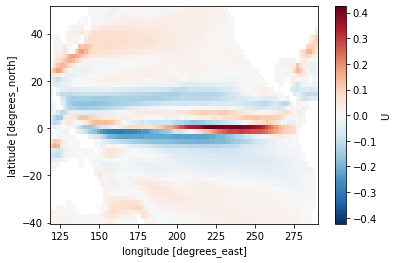

In [9]:
ika_s.forcing['U'].mean(axis=0).plot()

> Taxis values are really small compared to currents.

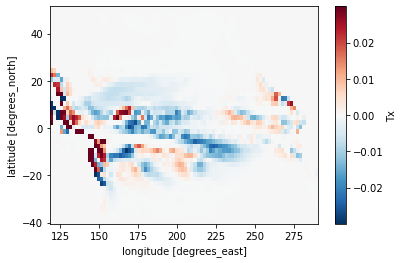

In [10]:
borne = 0.03
def fun_limit(x):
    x = np.where(x < -borne, -borne, x)
    x = np.where(x > borne, borne, x)
    return x
xr.apply_ufunc(fun_limit, ika_s.forcing['Tx']).mean(axis=0).plot()

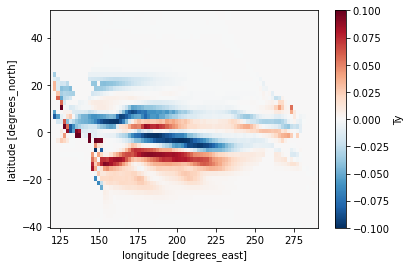

In [19]:
borne=0.1
xr.apply_ufunc(fun_limit, ika_s.forcing['Ty']).mean(axis=0).plot()

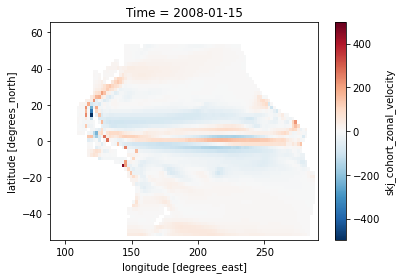

In [29]:
advection_x_sea[0].mean(axis=0).plot()

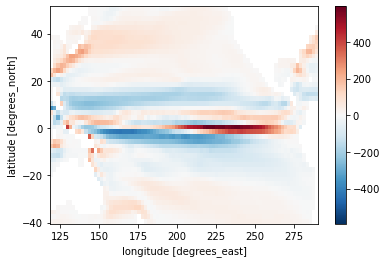

In [30]:
advection_x_ika.mean(axis=0).plot()

> Normalisation / Différence

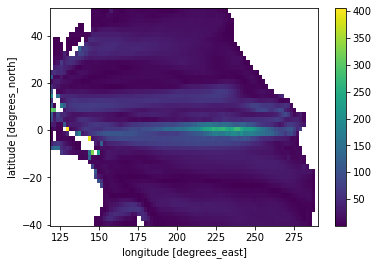

In [34]:
tmp = advection_x_sea[0,:5].loc[:, -39.5:50.5, 119.5:289.5]
tmp_res = abs(advection_x_ika- tmp.data)
tmp_res.mean(axis=0).plot()

> Advection y

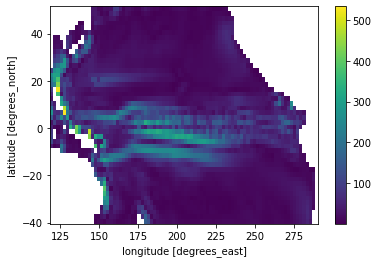

In [36]:
tmp = advection_y_sea[0,:5].loc[:, -39.5:50.5, 119.5:289.5]
tmp_res = abs(advection_y_ika - tmp.data)
tmp_res.mean(axis=0).plot()

# DIFFUSION

In [48]:
diffusion_sea

<xarray.DataArray 'skj_cohort_diffusion' (Time: 1, mean_age: 31, latitude: 60, longitude: 101)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 89.5 91.5 93.5 95.5 ... 285.5 287.5 289.5
  * latitude   (latitude) float64 -53.5 -51.5 -49.5 -47.5 ... 60.5 62.5 64.5
  * mean_age   (mean_age) float64 5.5 6.5 7.5 8.5 9.5 ... 32.5 33.5 34.5 35.5
  * Time       (Time) datetime64[ns] 2008-01-15
Attributes:
    units:      Nb/sq.km
    long_name:  skipjack_cohort_21.83cm_diffusion

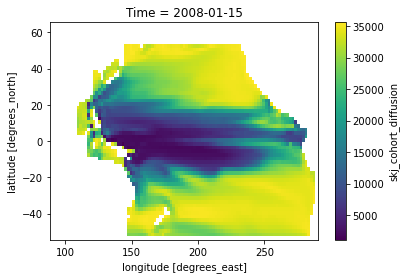

In [37]:
diffusion_sea[0].mean(axis=0).plot()

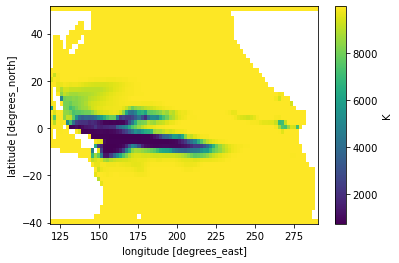

In [38]:
diffusion_ika.mean(axis=0).plot()

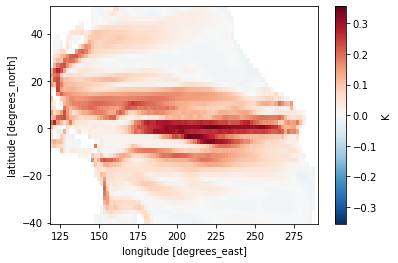

In [15]:
tmp = diffusion_sea[0,:5].loc[:, -39.5:50.5, 119.5:289.5]
tmp_res = abs((diffusion_ika / diffusion_ika.max())) - abs((tmp / tmp.max()).data)
tmp_res.mean(axis=0).plot()

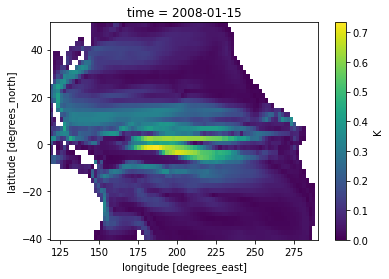

In [16]:
tmp = diffusion_sea[0,0].loc[-39.5:50.5, 119.5:289.5]
tmp_res = abs((diffusion_ika[0] / diffusion_ika[0].max())) - abs((tmp / tmp.max()).data)
tmp_res.plot()#mean(axis=0).plot()

---

In [ ]:
ika_s.createFieldSet()

In [ ]:
N = 5000
ika_s.initialiseFishParticles(start=None,n_fish=N, pclass=ika.ikafish.ikafish.IkaFish)

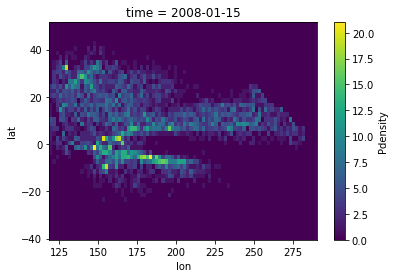

In [ ]:
ika_s.fishDensity().plot()

In [ ]:
#Run the behavioural kernels for two months
ika_s.runKernels(T=86400*60)

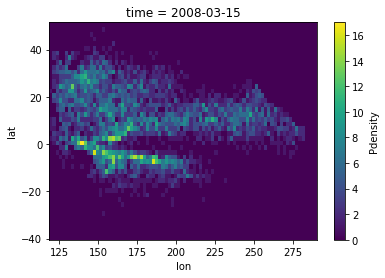

In [ ]:
ika_s.fishDensity().plot()